# EXPLORE Data Science Academy Classification Hackathon

Kaggle Challenge 2021 - Happy ndlovu

---

### Predict Overview:South African Language Identification



<a id="cont"></a>

## Table of Contents

<a href=#one> Introduction</a>

<a href=#two> Importing Packages</a>

<a href=#three> Loading Data</a>

<a href=#four> Preprocessing</a>

<a href=#five> Modeling</a>

<a href=#six> Conclusion</a>

<a href=#seven> Submission</a>

# Introduction

Create a Machine Learning model that is able to classify which language the a taxt belong to,
in short its the Natural Language processing(NLP).

Natural language processing (NLP) describes the interaction between human language and computers.
It's a technology that many people use daily and has been around for years, but is often taken for granted.
A few examples of NLP that people use every day are: Spell check

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in.
This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Importing libraries

In [45]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
# data preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

# classification model

from sklearn.svm import LinearSVC

# Performance Evaluation

from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


# Importing data

In [46]:
train_df = pd.read_csv("train_set.csv")
test_df=pd.read_csv('test_set.csv')


# Data preprocessing

In [47]:
train_df.head(5)# viewing the data

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [48]:
test_df.head(5)# viewing the data

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [49]:
train_df['lang_id'].unique() #checking the number of language the data has

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

### 

In [50]:
train_df["lang_id"].value_counts() #count the number of centans per language

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

### Separating Independent and Dependent features

In [51]:
X = train_df["text"]
y = train_df["lang_id"]

### Text Preprocessing

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [75]:
# Text preprocessing for test data
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in test_df['text']:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

# Modeling


### Split Training and Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

In [ ]:
X_train

25808    mulayo wa dzikhakhathi dza miani wa mulayo wa ...
4094     babe ma- kwaphela abakhombise bonyana imiseben...
14277    skills transfer - the bid clearly describes th...
19718    tinkhulumiswano mayelana nemininingwane lebona...
12313    boipelo ka selelo rra intshwarele ke ne ke dir...
                               ...                        
3915     ezi nkalo ziye zaba ngumbandela wokuhlalutywa ...
31962    mmidi ke sejosegolo ka jalo ntshokuno e e toka...
23452    go romela setefikeiti sa sepodisi sa kgololo f...
23775    alilali mphephu ndi nwana wa muhali wa vhahali...
27098    in all cases if the entry degree or diploma do...
Name: text, Length: 29700, dtype: object

### Label Encoding

In [ ]:
vect = TfidfVectorizer()
vect.fit_transform(X_train)

<29700x134167 sparse matrix of type '<class 'numpy.float64'>'
	with 837582 stored elements in Compressed Sparse Row format>

### Model Training and Prediction

In [ ]:
svc = LinearSVC()
svc.fit(vect.transform(X_train), y_train)
y_pred = svc.predict(vect.transform(X_test))

### Model Evaluation

In [ ]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9981818181818182

Accuracy is : 0.9981818181818182


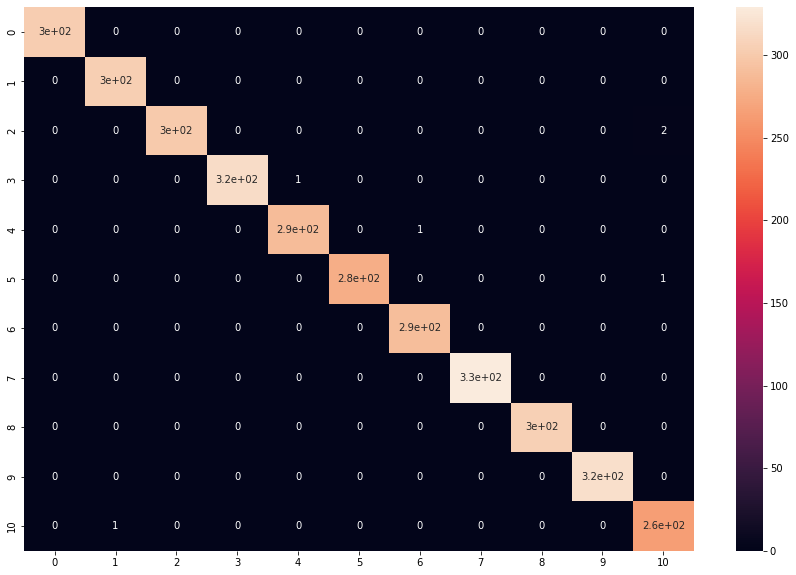

In [ ]:
# Create Classification Report
from sklearn import metrics

# A confusion matrix is used to evaluate the performance of the model
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# A Classification report is used to measure the quality of predictions from a classification algorithm
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       303
         eng       1.00      1.00      1.00       304
         nbl       1.00      0.99      1.00       302
         nso       1.00      1.00      1.00       316
         sot       1.00      1.00      1.00       290
         ssw       1.00      1.00      1.00       278
         tsn       1.00      1.00      1.00       290
         tso       1.00      1.00      1.00       329
         ven       1.00      1.00      1.00       305
         xho       1.00      1.00      1.00       318
         zul       0.99      1.00      0.99       265

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



# Submission
Creating a submission file to be submitted to kaggle with specified columns

In [68]:
X_Kaggle = test_df['text']

In [69]:
kaggle_pred = svc.predict(vect.transform(X_Kaggle))

In [73]:
pred_df = pd.DataFrame(data=test_df['index'], columns=['index']) # the creation of a data frame that show the prediction dataframe
pred_df.insert(1, 'lang_id', kaggle_pred, allow_duplicates=False)

pred_df.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [74]:
pred_df.to_csv(path_or_buf='npl_sa.csv', index=False)